In [324]:
import numpy as np
import pandas as pd
import anndata
import torch

In [325]:
predict_68 = torch.load('./predict_68.pt')
torch.unique(predict_68)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [326]:
predict_68.tolist()

[8,
 9,
 6,
 1,
 4,
 5,
 6,
 8,
 8,
 7,
 6,
 9,
 4,
 8,
 8,
 8,
 6,
 8,
 9,
 9,
 3,
 7,
 8,
 1,
 8,
 7,
 4,
 4,
 9,
 9,
 8,
 9,
 5,
 9,
 8,
 9,
 8,
 6,
 4,
 7,
 7,
 8,
 7,
 10,
 4,
 2,
 8,
 6,
 7,
 6,
 7,
 8,
 10,
 7,
 1,
 6,
 5,
 1,
 7,
 8,
 8,
 9,
 9,
 4,
 9,
 4,
 8,
 8,
 5,
 1,
 7,
 9,
 1,
 4,
 4,
 4,
 8,
 8,
 0,
 8,
 8,
 1,
 7,
 8,
 1,
 0,
 6,
 7,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 5,
 9,
 9,
 9,
 5,
 9,
 4,
 8,
 1,
 9,
 5,
 8,
 8,
 8,
 9,
 8,
 9,
 8,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 1,
 7,
 1,
 6,
 5,
 8,
 9,
 1,
 8,
 9,
 9,
 4,
 8,
 0,
 1,
 7,
 7,
 0,
 0,
 4,
 1,
 4,
 1,
 10,
 8,
 9,
 9,
 8,
 1,
 1,
 8,
 0,
 9,
 8,
 4,
 5,
 9,
 6,
 8,
 9,
 9,
 9,
 10,
 4,
 9,
 8,
 8,
 2,
 9,
 8,
 8,
 8,
 7,
 1,
 9,
 7,
 9,
 8,
 0,
 4,
 1,
 8,
 9,
 7,
 9,
 9,
 7,
 8,
 6,
 8,
 8,
 9,
 7,
 9,
 8,
 9,
 9,
 9,
 9,
 4,
 7,
 8,
 8,
 0,
 9,
 7,
 7,
 4,
 9,
 8,
 9,
 8,
 1,
 7,
 1,
 9,
 9,
 9,
 6,
 7,
 7,
 9,
 8,
 9,
 1,
 8,
 8,
 1,
 1,
 8,
 10,
 4,
 9,
 7,
 9,
 4,
 9,
 9,
 7,
 1,
 7,
 10,
 7,
 9,
 7,
 9,
 9,
 8,
 6

In [327]:
adata = anndata.read_h5ad('./Zheng68K.h5ad')

In [328]:
adata

AnnData object with n_obs × n_vars = 68450 × 16906
    obs: 'TSNE.1', 'TSNE.2', 'celltype', 'n_genes'
    uns: 'log1p'

In [329]:
label_dict, label = np.unique(np.array(adata.obs['celltype'][:]), return_inverse=True)

In [330]:
cell_dict = {
    0: 'CD14+ Monocyte',
    1: 'CD19+ B',
    2: 'CD34+',
    3: 'CD4+ T Helper2',
    4: 'CD4+/CD25 T Reg',
    5: 'CD4+/CD45RA+/CD25- Naive T',
    6: 'CD4+/CD45RO+ Memory',
    7: 'CD56+ NK',
    8: 'CD8+ Cytotoxic T',
    9: 'CD8+/CD45RA+ Naive Cytotoxic',
    10: 'Dendritic'
}
cell_dict

{0: 'CD14+ Monocyte',
 1: 'CD19+ B',
 2: 'CD34+',
 3: 'CD4+ T Helper2',
 4: 'CD4+/CD25 T Reg',
 5: 'CD4+/CD45RA+/CD25- Naive T',
 6: 'CD4+/CD45RO+ Memory',
 7: 'CD56+ NK',
 8: 'CD8+ Cytotoxic T',
 9: 'CD8+/CD45RA+ Naive Cytotoxic',
 10: 'Dendritic'}

In [331]:
label

array([8, 9, 6, ..., 8, 8, 8], dtype=int64)

In [332]:
df = adata.obs
df

,TSNE.1,TSNE.2,celltype,n_genes
AAACATACACCCAA-1,7.565540,0.441370,CD8+ Cytotoxic T,453
AAACATACCCCTCA-1,2.552626,-25.786672,CD8+/CD45RA+ Naive Cytotoxic,425
AAACATACCGGAGA-1,-5.771831,11.830846,CD4+/CD45RO+ Memory,489
AAACATACTAACCG-1,1.762556,25.979346,CD19+ B,319
AAACATACTCTTCA-1,-16.793856,-16.589970,CD4+/CD25 T Reg,390
...,...,...,...,...
TTTGCATGAGCCTA-8,1.430476,-23.815174,CD8+ Cytotoxic T,439
TTTGCATGCTAGCA-8,3.120762,-19.108131,CD8+/CD45RA+ Naive Cytotoxic,559
TTTGCATGCTGCAA-8,13.526124,-1.559099,CD8+ Cytotoxic T,482
TTTGCATGGCTCCT-8,11.646083,-3.386890,CD8+ Cytotoxic T,255


In [333]:
mapped_data = [cell_dict[type1] for type1 in predict_68.tolist()]
mapped_data

['CD8+ Cytotoxic T',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD4+/CD45RO+ Memory',
 'CD19+ B',
 'CD4+/CD25 T Reg',
 'CD4+/CD45RA+/CD25- Naive T',
 'CD4+/CD45RO+ Memory',
 'CD8+ Cytotoxic T',
 'CD8+ Cytotoxic T',
 'CD56+ NK',
 'CD4+/CD45RO+ Memory',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD4+/CD25 T Reg',
 'CD8+ Cytotoxic T',
 'CD8+ Cytotoxic T',
 'CD8+ Cytotoxic T',
 'CD4+/CD45RO+ Memory',
 'CD8+ Cytotoxic T',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD4+ T Helper2',
 'CD56+ NK',
 'CD8+ Cytotoxic T',
 'CD19+ B',
 'CD8+ Cytotoxic T',
 'CD56+ NK',
 'CD4+/CD25 T Reg',
 'CD4+/CD25 T Reg',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD8+ Cytotoxic T',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD4+/CD45RA+/CD25- Naive T',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD8+ Cytotoxic T',
 'CD8+/CD45RA+ Naive Cytotoxic',
 'CD8+ Cytotoxic T',
 'CD4+/CD45RO+ Memory',
 'CD4+/CD25 T Reg',
 'CD56+ NK',
 'CD56+ NK',
 'CD8+ Cytotoxic T',
 'CD56+ NK',
 'Dendritic',
 'CD4+/CD25 T

In [334]:
df['predicted_celltype'] = mapped_data
df

,TSNE.1,TSNE.2,celltype,n_genes,predicted_celltype
AAACATACACCCAA-1,7.565540,0.441370,CD8+ Cytotoxic T,453,CD8+ Cytotoxic T
AAACATACCCCTCA-1,2.552626,-25.786672,CD8+/CD45RA+ Naive Cytotoxic,425,CD8+/CD45RA+ Naive Cytotoxic
AAACATACCGGAGA-1,-5.771831,11.830846,CD4+/CD45RO+ Memory,489,CD4+/CD45RO+ Memory
AAACATACTAACCG-1,1.762556,25.979346,CD19+ B,319,CD19+ B
AAACATACTCTTCA-1,-16.793856,-16.589970,CD4+/CD25 T Reg,390,CD4+/CD25 T Reg
...,...,...,...,...,...
TTTGCATGAGCCTA-8,1.430476,-23.815174,CD8+ Cytotoxic T,439,CD8+ Cytotoxic T
TTTGCATGCTAGCA-8,3.120762,-19.108131,CD8+/CD45RA+ Naive Cytotoxic,559,CD8+/CD45RA+ Naive Cytotoxic
TTTGCATGCTGCAA-8,13.526124,-1.559099,CD8+ Cytotoxic T,482,CD8+ Cytotoxic T
TTTGCATGGCTCCT-8,11.646083,-3.386890,CD8+ Cytotoxic T,255,CD8+ Cytotoxic T


In [335]:
df['predicted_result'] = (df['celltype'] == df['predicted_celltype'])
df

,TSNE.1,TSNE.2,celltype,n_genes,predicted_celltype,predicted_result
AAACATACACCCAA-1,7.565540,0.441370,CD8+ Cytotoxic T,453,CD8+ Cytotoxic T,True
AAACATACCCCTCA-1,2.552626,-25.786672,CD8+/CD45RA+ Naive Cytotoxic,425,CD8+/CD45RA+ Naive Cytotoxic,True
AAACATACCGGAGA-1,-5.771831,11.830846,CD4+/CD45RO+ Memory,489,CD4+/CD45RO+ Memory,True
AAACATACTAACCG-1,1.762556,25.979346,CD19+ B,319,CD19+ B,True
AAACATACTCTTCA-1,-16.793856,-16.589970,CD4+/CD25 T Reg,390,CD4+/CD25 T Reg,True
...,...,...,...,...,...,...
TTTGCATGAGCCTA-8,1.430476,-23.815174,CD8+ Cytotoxic T,439,CD8+ Cytotoxic T,True
TTTGCATGCTAGCA-8,3.120762,-19.108131,CD8+/CD45RA+ Naive Cytotoxic,559,CD8+/CD45RA+ Naive Cytotoxic,True
TTTGCATGCTGCAA-8,13.526124,-1.559099,CD8+ Cytotoxic T,482,CD8+ Cytotoxic T,True
TTTGCATGGCTCCT-8,11.646083,-3.386890,CD8+ Cytotoxic T,255,CD8+ Cytotoxic T,True


In [336]:
df['predicted_result'].sum(axis=0)

61770

# 开始画图

In [337]:
color_dict = {
    'CD14+ Monocyte': '#42a5f5',
    'CD19+ B': '#89c2d9',
    'CD34+': '#f8961e',
    'CD4+ T Helper2': '#6c757d',
    'CD4+/CD25 T Reg': '#f9c74f',
    'CD4+/CD45RA+/CD25- Naive T': '#90be6d',
    'CD4+/CD45RO+ Memory': '#43aa8b',
    'CD56+ NK': '#74c69d',
    'CD8+ Cytotoxic T': '#ef476f',
    'CD8+/CD45RA+ Naive Cytotoxic': '#c8b6ff',
    'Dendritic': '#ff8500',
}

color_list_true = [color_dict[type1] for type1 in df['celltype']]
color_list_predicted = [color_dict[type1] for type1 in df['predicted_celltype']]

In [338]:
import matplotlib
%matplotlib inline
# matplotlib.use('svg')
import matplotlib.pyplot as plt

# 设置DPI
plt.rcParams['figure.dpi'] = 200
# 取消网格线
# plt.grid(False)
# 设置输出图片尺寸（单位为英寸）
# plt.gcf().set_size_inches(4, 4)


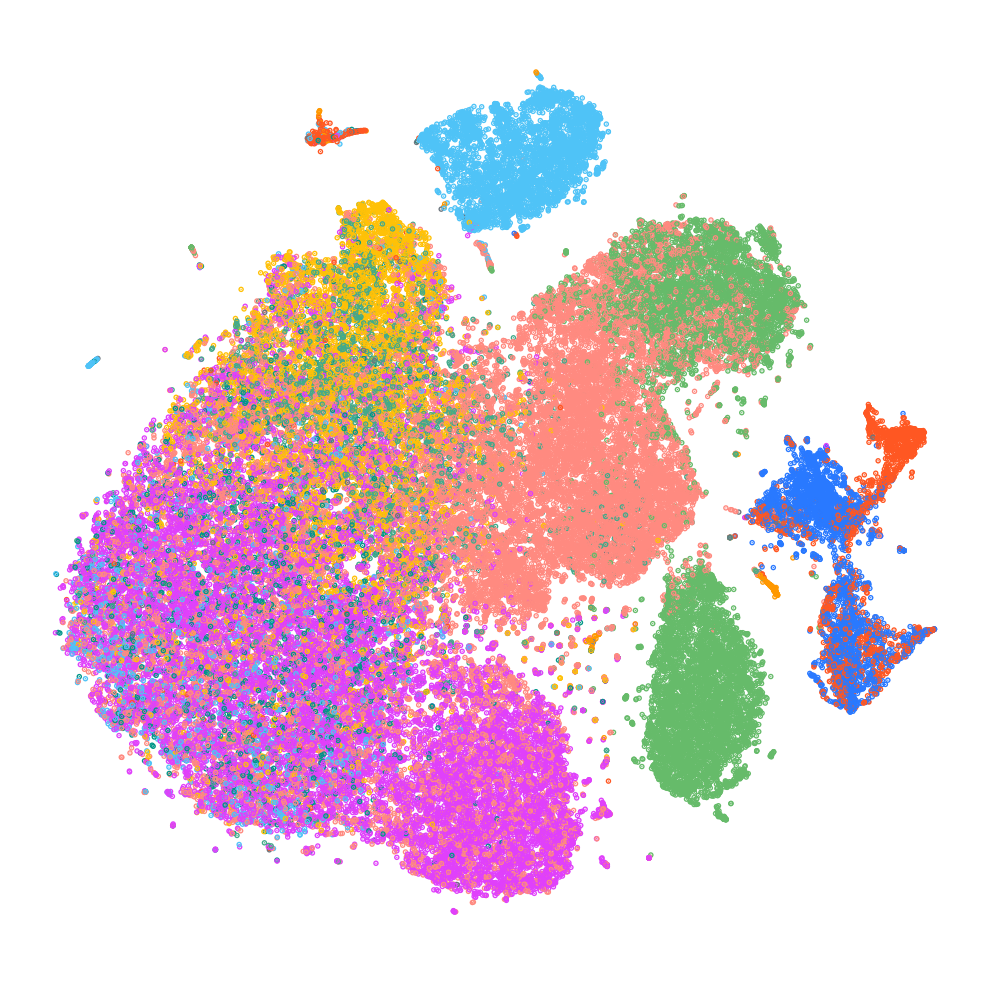

In [339]:
# 绘制真实值

# 取消网格线
plt.grid(False)
# 设置输出图片尺寸（单位为英寸）
plt.gcf().set_size_inches(4, 4)
plt.axis('equal')
plt.axis('off')
plt.scatter(
    adata.obs['TSNE.1'].tolist(),
    adata.obs['TSNE.2'].tolist(),
    c=color_list_true,
    s=0.1,
    marker='o'
)
# plt.savefig('./assets/T-SNE_big-data_true.svg', format=('svg'))

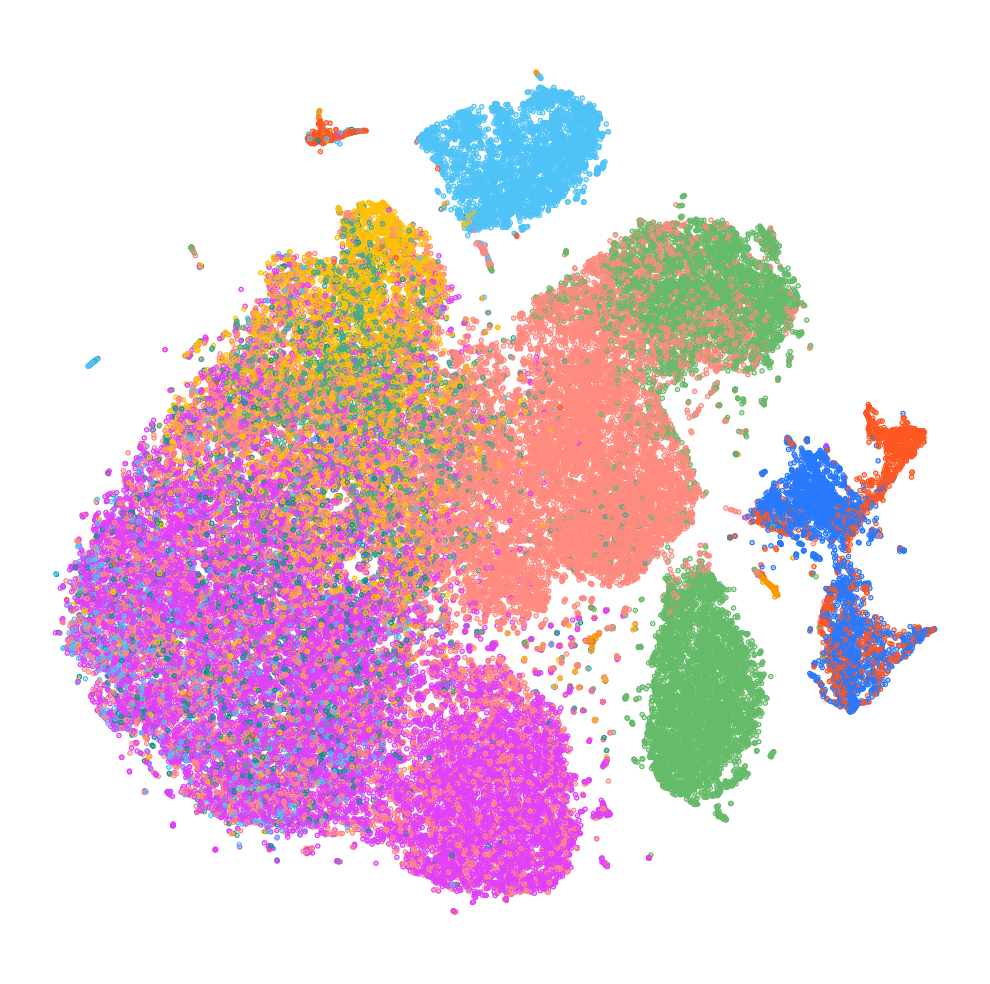

In [340]:
# 绘制预测值
# 取消网格线
plt.grid(False)
# 设置输出图片尺寸（单位为英寸）
plt.gcf().set_size_inches(4, 4)
plt.axis('equal')
plt.axis('off')
plt.scatter(
    adata.obs['TSNE.1'].tolist(),
    adata.obs['TSNE.2'].tolist(),
    c=color_list_predicted,
    s=0.1,
    marker='o'
)
# plt.savefig('./assets/T-SNE_big-data_predicted.svg', format=('svg'))